The world indicators dataset compares different countries based on selected attributes. 
1. Use K-means and hierarchical clustering methods to group similar countries together 
2. Use Internal validation metrics to report the cluster quality 
3. Report the best clustering solution. Give a detailed list of all the groups and the countries included within the groups 
4. Generate three different scatter plots of your choice and color the data points according to the group. Example: “Life expectancy vs GDP”, “Infant Mortality vs GDP”, etc

Following evaluation metrics have been used to evaluate the model

1.**Elbow curve**

The elbow curve is used to determine the optimal number of clusters to use in a clustering algorithm. The curve looks like an elbow, and the optimal number of clusters is the point at which the curve starts to level off and the improvement in WSS becomes marginal.

The formula for calculating the WSS is:

WSS = Σ(xi - ci)^2

where xi is the data point, ci is the centroid of the cluster to which xi belongs, and Σ represents the sum over all data points in the cluster.


2.**Silhouette score**

The silhouette score is a metric used to evaluate the quality of clustering algorithms, by measuring the similarity of each data point within a cluster with respect to the other data points in its own cluster and the data points in the neighboring clusters.

The silhouette score of a data point is calculated as:

s(i) = (b(i) - a(i)) / max(a(i), b(i))

where s(i) is the silhouette score of the i-th data point, a(i) is the average distance of i-th data point to all other data points within its cluster, and b(i) is the smallest average distance of i-th data point to all data points of the nearest neighboring cluster. 





3.**Adjusted rand index**

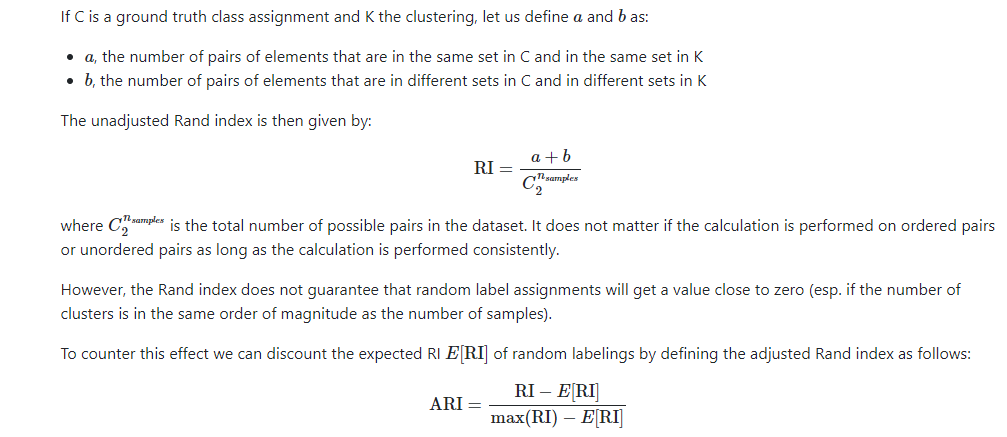

4.**Homogeneity score**

h = 1 - (H(C|K) / H(C))

where H(C) is the entropy of the ground truth class labels, H(C|K) is the entropy of the conditional distribution of ground truth class labels given the cluster assignments, and h is the homogeneity score.

5.Dunn Index

Dunn index = D_min / D_max

where D_min is the minimum distance between any two clusters, and D_max is the maximum distance between any two points within the same cluster.

6.**CH score (Calinski-Harabasz index)**
Ratio of the between-cluster variance to the within-cluster variance, multiplied by the ratio of the sample size to the number of clusters minus one.

The formula for the CH score is:

CH score = (B/(k-1))/(W/(n-k))

where B is the between-cluster variance, W is the within-cluster variance, k is the number of clusters, and n is the total number of data points.

In [ ]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the data set

df=pd.read_csv("/content/drive/MyDrive/My colab notebooks/Foundations data analytics/Project - 1 Clustering/Data_files/World Indicators.csv")

In [ ]:
df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [ ]:
df.shape

(208, 20)

In [ ]:
# % of null values in each column
df.isnull().sum()*100/df.shape[0]

Birth Rate                 4.326923
Business Tax Rate         12.980769
Days to Start Business    12.980769
Energy Usage              34.615385
GDP                        9.615385
Health Exp % GDP          11.057692
Health Exp/Capita         11.057692
Hours to do Tax           13.461538
Infant Mortality Rate      9.615385
Internet Usage             4.326923
Lending Interest          37.019231
Life Expectancy Female     5.288462
Life Expectancy Male       5.288462
Mobile Phone Usage         5.769231
Population 0-14            8.173077
Population 15-64           8.173077
Population 65+             8.173077
Population Urban           0.961538
Region                     0.000000
Country                    0.000000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

Energy Usage and Lending Interest has the highest percentage of null values. We will drop those columns

In [ ]:
df_clean=df.drop(['Energy Usage', 'Lending Interest'], axis=1)

In [ ]:
df_clean

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [ ]:
#k-means cannot handle null values. Hence, dropping all the rows with even a single null value
df_clean=df_clean.dropna(how='any')

In [ ]:
df_clean.shape

(171, 18)

In [ ]:
df_clean

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9%,694.0,"$4,363,219,094",0.060,$490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname
202,0.015,29.1%,41.0,"$23,676,348,287",0.053,$935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
204,0.013,46.5%,5.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 206
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              171 non-null    float64
 1   Business Tax Rate       171 non-null    object 
 2   Days to Start Business  171 non-null    float64
 3   GDP                     171 non-null    object 
 4   Health Exp % GDP        171 non-null    float64
 5   Health Exp/Capita       171 non-null    object 
 6   Hours to do Tax         171 non-null    float64
 7   Infant Mortality Rate   171 non-null    float64
 8   Internet Usage          171 non-null    float64
 9   Life Expectancy Female  171 non-null    float64
 10  Life Expectancy Male    171 non-null    float64
 11  Mobile Phone Usage      171 non-null    float64
 12  Population 0-14         171 non-null    float64
 13  Population 15-64        171 non-null    float64
 14  Population 65+          171 non-null    fl

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# cleaning the numeric columns by removing any string character
df_clean.loc[:,'Business Tax Rate']=df_clean.loc[:,'Business Tax Rate'].str.replace('%','')
df_clean.loc[:,'GDP']=df_clean['GDP'].str.replace('$','')
df_clean.loc[:,'GDP']=df_clean['GDP'].str.replace(',','')
df_clean.loc[:,'Health Exp/Capita']=df_clean['Health Exp/Capita'].str.replace('$','')
df_clean.loc[:,'Health Exp/Capita']=df_clean['Health Exp/Capita'].str.replace(',','')

In [ ]:
df_clean.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 206
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              171 non-null    float64
 1   Business Tax Rate       171 non-null    object 
 2   Days to Start Business  171 non-null    float64
 3   GDP                     171 non-null    object 
 4   Health Exp % GDP        171 non-null    float64
 5   Health Exp/Capita       171 non-null    object 
 6   Hours to do Tax         171 non-null    float64
 7   Infant Mortality Rate   171 non-null    float64
 8   Internet Usage          171 non-null    float64
 9   Life Expectancy Female  171 non-null    float64
 10  Life Expectancy Male    171 non-null    float64
 11  Mobile Phone Usage      171 non-null    float64
 12  Population 0-14         171 non-null    float64
 13  Population 15-64        171 non-null    float64
 14  Population 65+          171 non-null    fl

In [ ]:
#converting object type indicator columns to numeric columns
df_clean[['Business Tax Rate','GDP','Health Exp/Capita']]=df_clean[['Business Tax Rate','GDP','Health Exp/Capita']].apply(pd.to_numeric, errors="coerce")

In [ ]:
#checking for null values again
df_clean.isnull().sum()

Birth Rate                0
Business Tax Rate         0
Days to Start Business    0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Urban          0
Region                    0
Country                   0
dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 206
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              171 non-null    float64
 1   Business Tax Rate       171 non-null    float64
 2   Days to Start Business  171 non-null    float64
 3   GDP                     171 non-null    int64  
 4   Health Exp % GDP        171 non-null    float64
 5   Health Exp/Capita       171 non-null    int64  
 6   Hours to do Tax         171 non-null    float64
 7   Infant Mortality Rate   171 non-null    float64
 8   Internet Usage          171 non-null    float64
 9   Life Expectancy Female  171 non-null    float64
 10  Life Expectancy Male    171 non-null    float64
 11  Mobile Phone Usage      171 non-null    float64
 12  Population 0-14         171 non-null    float64
 13  Population 15-64        171 non-null    float64
 14  Population 65+          171 non-null    fl

In [ ]:
#outlier detection

df_clean.describe()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
count,171.000000,171.000000,171.000000,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.022374,45.159649,30.725146,4.107954e+11,0.067994,1081.900585,283.970760,0.027398,0.361988,72.187135,67.514620,0.950877,0.289199,0.633404,0.077339,0.556497
std,0.010923,36.690978,57.842488,1.460929e+12,0.027527,1874.461060,252.828271,0.025273,0.281205,10.152372,8.875185,0.392484,0.108852,0.071361,0.054458,0.232266
min,0.008000,8.400000,1.000000,1.722537e+08,0.019000,12.000000,12.000000,0.002000,0.000000,45.000000,45.000000,0.000000,0.132000,0.475000,0.003000,0.089000
25%,0.013000,30.550000,9.000000,8.507757e+09,0.049000,85.000000,154.000000,0.007000,0.100000,65.000000,61.500000,0.700000,0.185000,0.578500,0.033000,0.365000
50%,0.020000,39.000000,18.000000,2.904438e+10,0.067000,310.000000,225.000000,0.016000,0.300000,76.000000,69.000000,1.000000,0.284000,0.651000,0.053000,0.553000
75%,0.032000,48.250000,35.500000,2.250653e+11,0.086500,931.500000,333.000000,0.042500,0.600000,79.500000,74.000000,1.200000,0.386000,0.682500,0.118000,0.747000
max,0.050000,339.100000,694.000000,1.553380e+13,0.177000,9908.000000,2600.000000,0.112000,0.900000,86.000000,81.000000,2.000000,0.499000,0.857000,0.237000,1.000000


# Feature Scaling

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train = scaler.fit_transform(df_clean.drop(['Region','Country'], axis = 1))
df_train

array([[ 0.24108544,  0.73367294, -0.0992689 , ...,  0.66894359,
        -0.55875005,  0.541928  ],
       [ 2.16923203,  0.18971241,  0.61163433, ..., -1.88897045,
        -0.98233601, -0.63689987],
       [ 1.34288349,  0.56693127, -0.02991249, ..., -1.32679154,
        -0.89025211, -0.57644716],
       ...,
       [-0.86071261,  0.03663809, -0.44605096, ...,  0.50028992,
         1.0250931 ,  1.09032046],
       [-0.6770796 , -0.08910153, -0.41137276, ...,  0.06460126,
         1.13559379,  1.68189342],
       [-0.21799708,  0.4821937 ,  1.91206706, ...,  0.24730941,
        -0.35616546,  1.43144647]])

In [ ]:
df_train=pd.DataFrame(df_train, columns = df_clean.columns[:-2])

In [ ]:
df_train

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.241085,0.733673,-0.099269,-0.145350,-0.874226,-0.454207,0.662583,-0.174521,-0.934401,-0.018487,0.167855,-0.130010,-0.158467,0.668944,-0.558750,0.541928
1,2.169232,0.189712,0.611634,-0.210537,-1.238575,-0.483635,-0.007818,3.159010,-0.934401,-1.895467,-1.979233,-1.152154,1.730363,-1.888970,-0.982336,-0.636900
2,1.342883,0.566931,-0.029912,-0.277006,-0.837791,-0.560683,-0.055420,1.293820,-1.291058,-1.203948,-1.075196,-0.385546,1.315742,-1.326792,-0.890252,-0.576447
3,0.149269,-0.701399,0.507600,-0.271515,-0.582746,-0.362713,-0.523511,0.460438,-0.934401,-2.586986,-2.318247,1.403207,0.468072,-0.118107,-0.779751,0.036716
4,1.801966,-0.045366,-0.307338,-0.274877,-0.145527,-0.558008,-0.055420,1.611300,-1.291058,-1.599102,-1.414210,-1.152154,1.555301,-1.635990,-0.963919,-1.258699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.401630,-0.471787,11.500591,-0.279018,-0.291267,-0.316698,-0.337068,-0.214206,-0.221086,0.179090,-0.058154,0.125526,-0.057115,0.261364,-0.227248,0.459885
167,-0.677080,-0.438986,0.178157,-0.265760,-0.546311,-0.078600,-0.293432,-0.293575,0.848886,0.080302,-0.171159,1.147671,-0.757364,1.048414,0.141088,-2.018676
168,-0.860713,0.036638,-0.446051,10.382036,3.971623,3.951423,-0.384670,-0.849164,1.205544,0.870609,0.958887,-0.130010,-0.849502,0.500290,1.025093,1.090320
169,-0.677080,-0.089102,-0.411373,-0.249585,0.728912,0.070145,0.206393,-0.690424,0.492229,0.771821,0.619873,1.147671,-0.609943,0.064601,1.135594,1.681893


# K-Means Clustering

# Finding optimum number of clusters using internal validation

# 1. Elbow method

In [ ]:
from sklearn.cluster import KMeans

#calculating within cluster score to get the optimum number of clusters. 
# k - stores number of cluster, wcss-stores the within cluster score for every k
k = []
wcss = []

#building k means for number of clusters varying from 1 to 10 and calculating wcss score
for i in range(1,11):
  mdl = KMeans(n_clusters=i, n_init='auto', random_state=42, max_iter=300)
  mdl.fit(df_train)
  k.append(i)
  wcss.append(mdl.inertia_)

In [ ]:
wcss

[2736.0000000000005,
 1665.9747244540863,
 1384.5062203831244,
 1256.2803771391723,
 1176.4106370998413,
 1074.4271120302988,
 994.6116045326851,
 830.5268981354722,
 769.1701222209459,
 736.9652131515974]

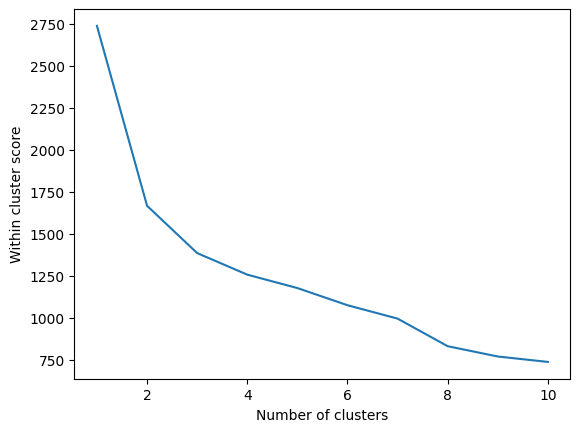

In [ ]:
#elbow plot
sns.lineplot(x=k, y=wcss) 
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster score')
plt.show()

In [ ]:
#using kneed package in python to determine the optimum number of clusters from elbow curve
!pip install kneed
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# using kneed to locate the elbow
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")

kl.elbow

3

# 2. Silhoutte score

In [ ]:
#calculating silhoutte score

from sklearn.metrics import silhouette_score
# a list to store silhoutte_coefficient for every k-means model
silhouette_coeff = []
n=[] #stores n_clusters value

# building k means model for k varying from 2 to 10 and calculating siilhoutte score
for k in range(2, 11):
  mdl = KMeans(n_clusters=k, n_init='auto', random_state=42, max_iter=300)
  mdl.fit(df_train)
  score = silhouette_score(df_train, mdl.labels_)
  silhouette_coeff.append(score)
  n.append(k)

In [ ]:
silhouette_coeff

[0.361108968463887,
 0.29382368437708545,
 0.22798049292348627,
 0.22101589571688846,
 0.22220306751147784,
 0.2270540811054296,
 0.19065217251936467,
 0.2047593590079276,
 0.17929322887498175]

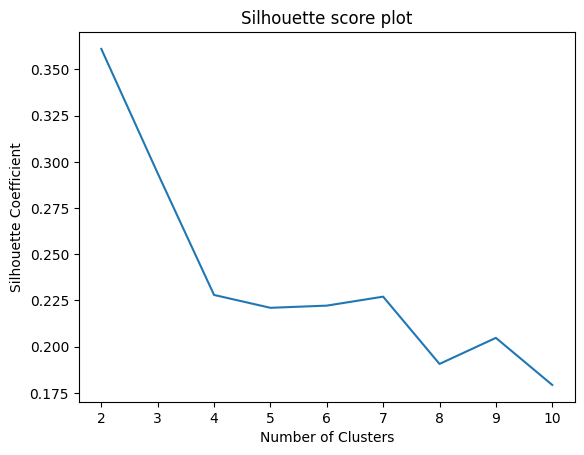

In [ ]:
# plotting silhoutte score vs number of clusters

import matplotlib.pyplot as plt

plt.plot(n, silhouette_coeff)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette score plot")
plt.show()

In [ ]:
! pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Figure size 800x550 with 0 Axes>

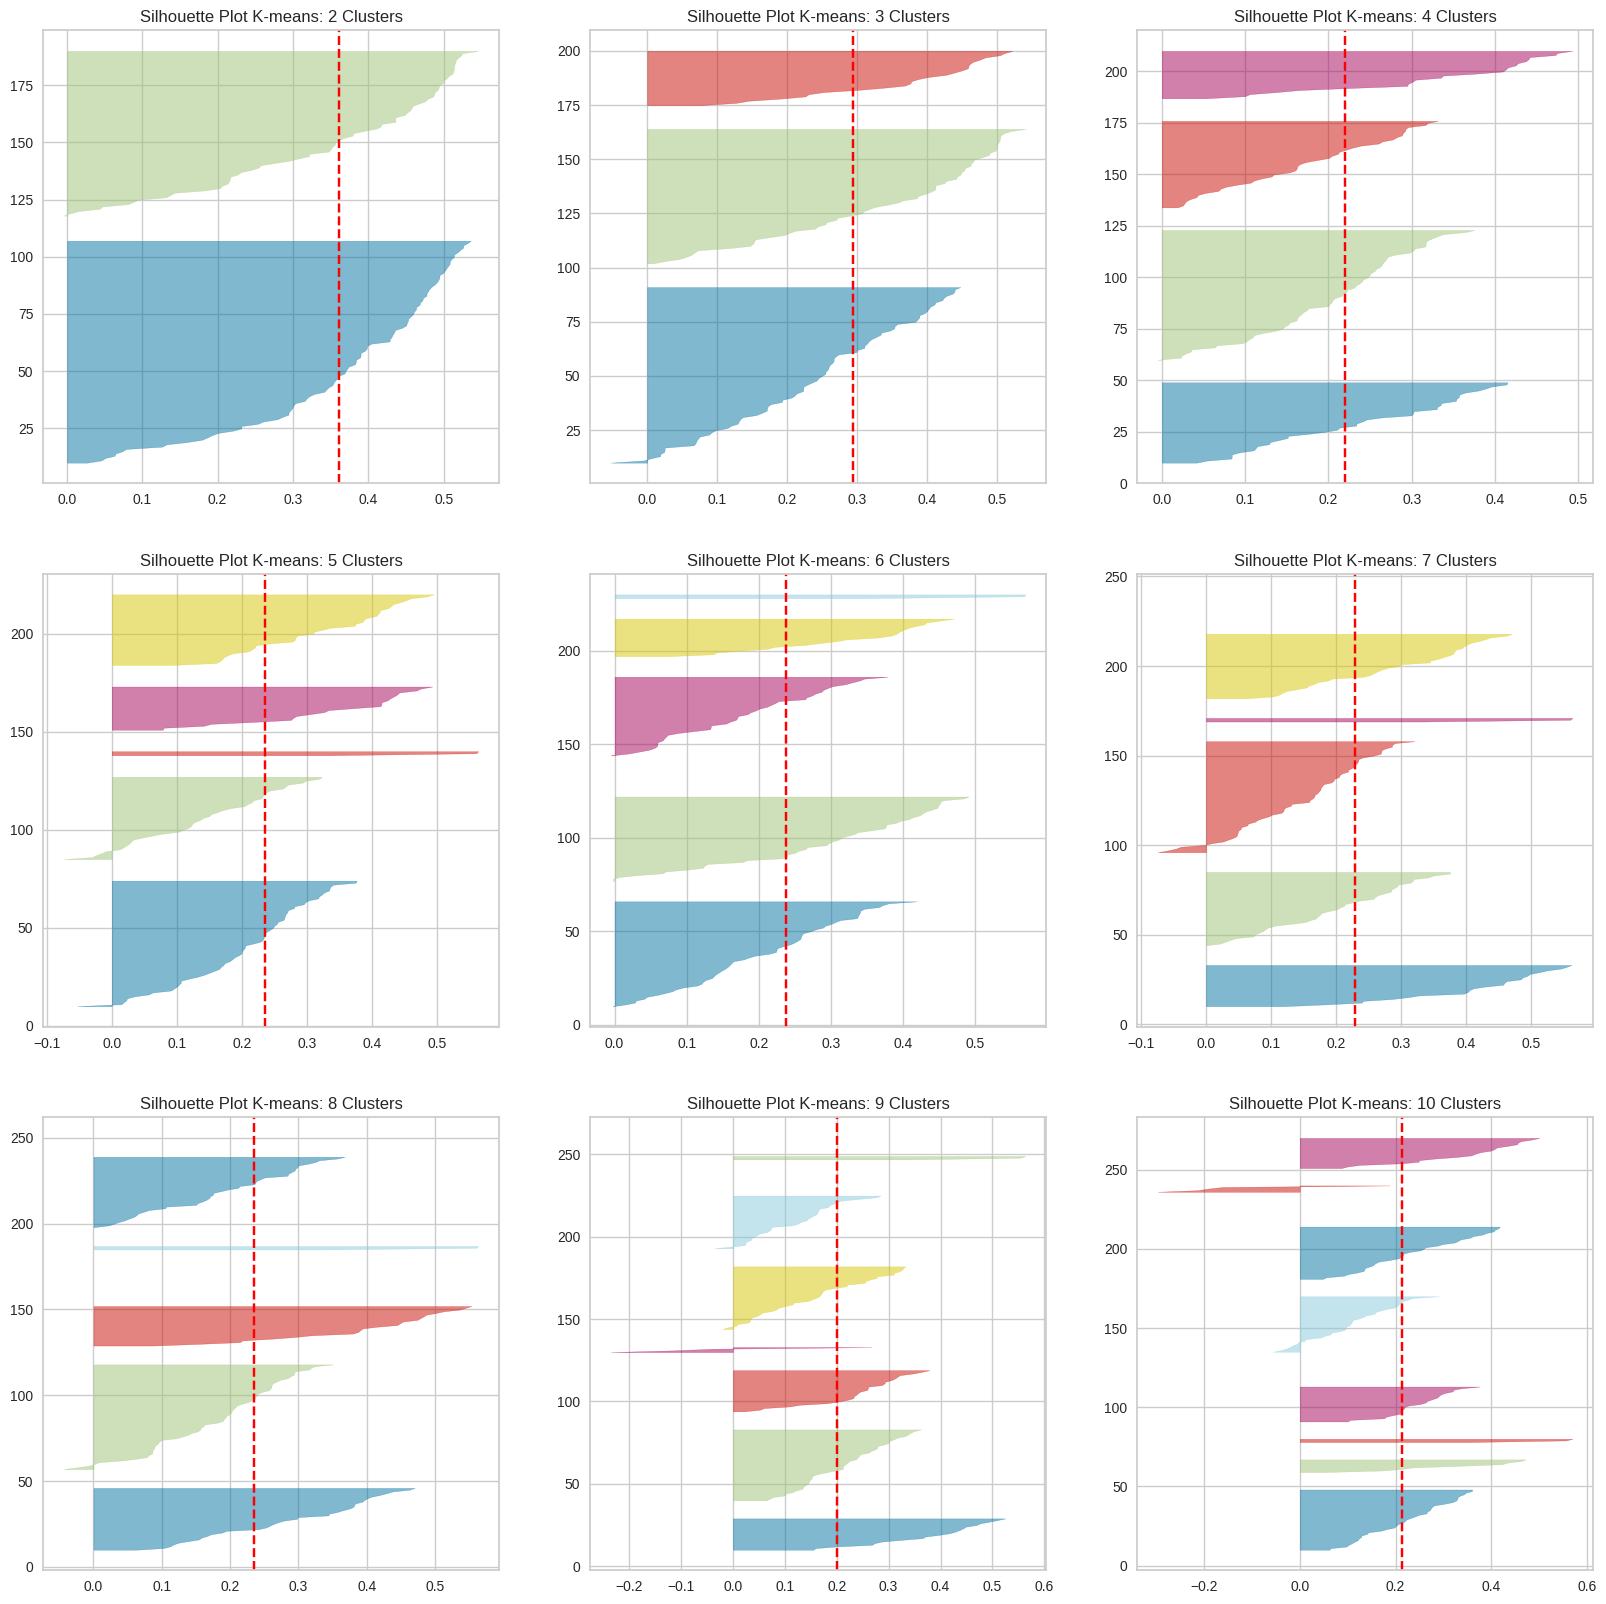

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer 
plt.subplots_adjust(hspace=0.5)
plt.figure(figsize=(20, 20))

count=0
for i in range(2,11):
    mdl = KMeans(n_clusters=i, random_state=42)
    ax1 = plt.subplot(3, 3, count+1 )
    ax1.set_title('Silhouette Plot K-means: {} Clusters'.format(i))
    fig = SilhouetteVisualizer(mdl, colors='yellowbrick', ax=ax1)
    count+=1
    fig.fit(df_train)

Based on elbow plot according to which n=3, and silhouette score, the optimum number of clusters can be set to 3 as the cluster sizes are somewhat uniform for n=3

# Building final K-means model with n_clusters=3

In [ ]:
mdl1 = KMeans(n_clusters=3, n_init='auto', random_state=42, max_iter=300)
mdl1.fit(df_train)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [ ]:
df_train['kmeans_labels']=mdl1.labels_

In [ ]:
df_train

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,kmeans_labels
0,0.241085,0.733673,-0.099269,-0.145350,-0.874226,-0.454207,0.662583,-0.174521,-0.934401,-0.018487,0.167855,-0.130010,-0.158467,0.668944,-0.558750,0.541928,0
1,2.169232,0.189712,0.611634,-0.210537,-1.238575,-0.483635,-0.007818,3.159010,-0.934401,-1.895467,-1.979233,-1.152154,1.730363,-1.888970,-0.982336,-0.636900,1
2,1.342883,0.566931,-0.029912,-0.277006,-0.837791,-0.560683,-0.055420,1.293820,-1.291058,-1.203948,-1.075196,-0.385546,1.315742,-1.326792,-0.890252,-0.576447,1
3,0.149269,-0.701399,0.507600,-0.271515,-0.582746,-0.362713,-0.523511,0.460438,-0.934401,-2.586986,-2.318247,1.403207,0.468072,-0.118107,-0.779751,0.036716,1
4,1.801966,-0.045366,-0.307338,-0.274877,-0.145527,-0.558008,-0.055420,1.611300,-1.291058,-1.599102,-1.414210,-1.152154,1.555301,-1.635990,-0.963919,-1.258699,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.401630,-0.471787,11.500591,-0.279018,-0.291267,-0.316698,-0.337068,-0.214206,-0.221086,0.179090,-0.058154,0.125526,-0.057115,0.261364,-0.227248,0.459885,0
167,-0.677080,-0.438986,0.178157,-0.265760,-0.546311,-0.078600,-0.293432,-0.293575,0.848886,0.080302,-0.171159,1.147671,-0.757364,1.048414,0.141088,-2.018676,0
168,-0.860713,0.036638,-0.446051,10.382036,3.971623,3.951423,-0.384670,-0.849164,1.205544,0.870609,0.958887,-0.130010,-0.849502,0.500290,1.025093,1.090320,2
169,-0.677080,-0.089102,-0.411373,-0.249585,0.728912,0.070145,0.206393,-0.690424,0.492229,0.771821,0.619873,1.147671,-0.609943,0.064601,1.135594,1.681893,0


In [ ]:
# adding labels to the original data set
df_clean['kmeans_label']=mdl1.labels_

In [ ]:
df_clean

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,kmeans_label
0,0.025,72.0,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,0
1,0.046,52.1,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola,1
2,0.037,65.9,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin,1
3,0.024,19.5,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,1
4,0.042,43.5,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9,694.0,4363219094,0.060,490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname,0
202,0.015,29.1,41.0,23676348287,0.053,935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago,0
204,0.013,46.5,5.0,15533800000000,0.177,8467,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States,2
205,0.015,41.9,7.0,47236710623,0.088,1213,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay,0


In [ ]:
# printing the countries in each cluster
for i in range(0,3):
  print("Cluster:", i)
  print(list(df_clean[df_clean['kmeans_label']==i]['Country']))
  print()

Cluster: 0
['Algeria', 'Egypt, Arab Rep.', 'Mauritius', 'Morocco', 'Seychelles', 'South Africa', 'Tunisia', 'Armenia', 'Azerbaijan', 'Bhutan', 'Brunei Darussalam', 'China', 'Georgia', 'Indonesia', 'Kazakhstan', 'Kyrgyz Republic', 'Malaysia', 'Mongolia', 'Philippines', 'Singapore', 'Sri Lanka', 'Thailand', 'Uzbekistan', 'Vietnam', 'Albania', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Estonia', 'Hungary', 'Latvia', 'Lithuania', 'Macedonia, FYR', 'Moldova', 'Montenegro', 'Poland', 'Romania', 'Russian Federation', 'Serbia', 'Slovak Republic', 'Turkey', 'Ukraine', 'Bahrain', 'Iran, Islamic Rep.', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Fiji', 'Antigua and Barbuda', 'Argentina', 'Bahamas, The', 'Barbados', 'Belize', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Pe

 dunn index and calinski_harabasz_score are compared between different 
 clustering method for our k choice. kmeans has similar calinski_harabasz_score as AgglomerativeClustering but a lower dunn index 
 value 

In [ ]:
!pip install validclust
from validclust import dunn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# internal validation for k-means
from sklearn.metrics import pairwise_distances
from sklearn import metrics

In [ ]:
#dunn index and ch score
df_train_distance = pairwise_distances(df_train.iloc[:,0:16])
dunn_kmeans_score= dunn(df_train_distance, mdl1.labels_)
print('dunn',dunn_kmeans_score)
print('calinski_harabasz_score',metrics.calinski_harabasz_score(df_train.iloc[:,0:16], mdl1.labels_))

dunn 0.0576205675307428
calinski_harabasz_score 81.99708734887624


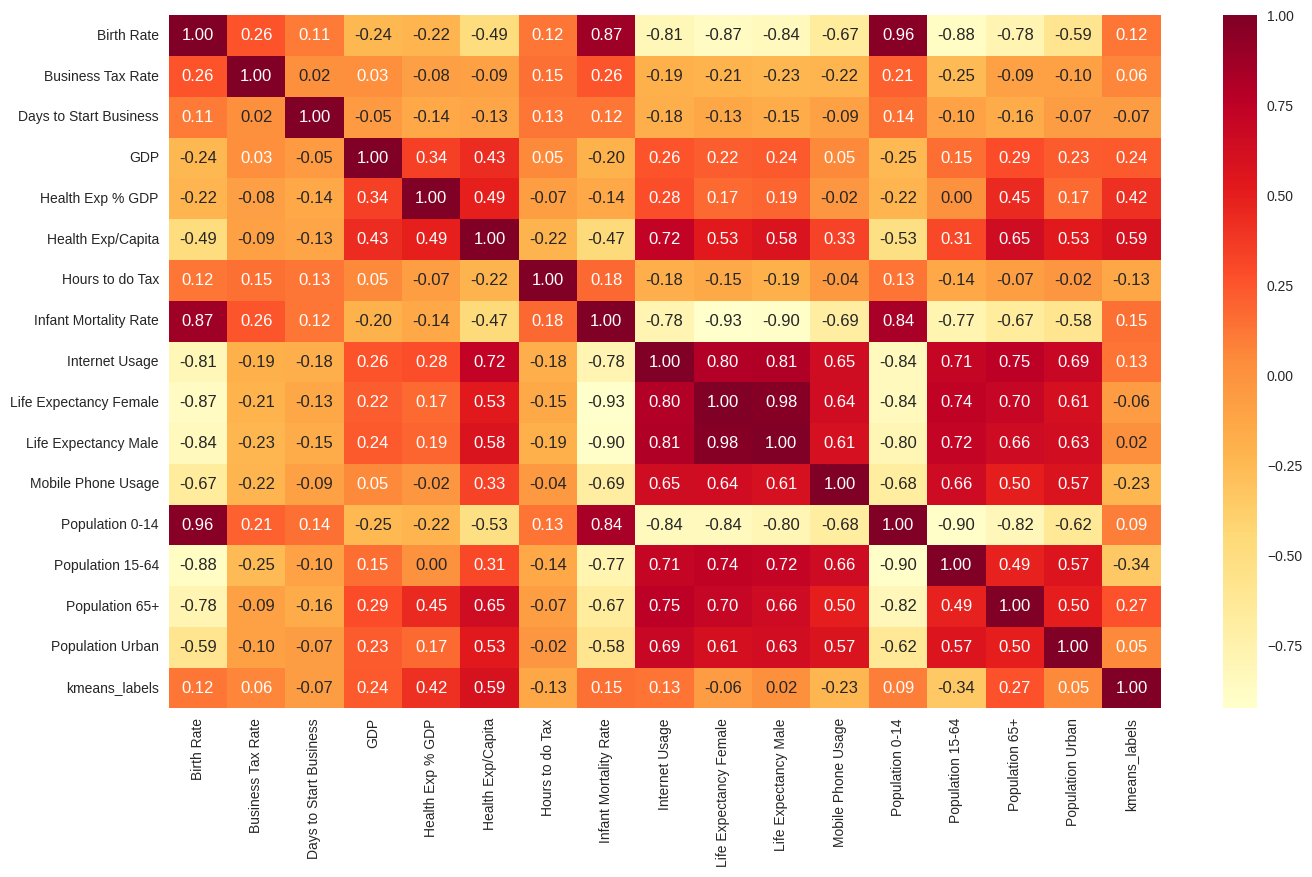

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df_train[:-2].corr(),cmap="YlOrRd",annot=True,fmt='.2f')
plt.show()

# Plots for K-means clustering

In [ ]:
LABEL_COLOR_MAP = {0: 'g', 1: 'r', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in df_clean['kmeans_label']]

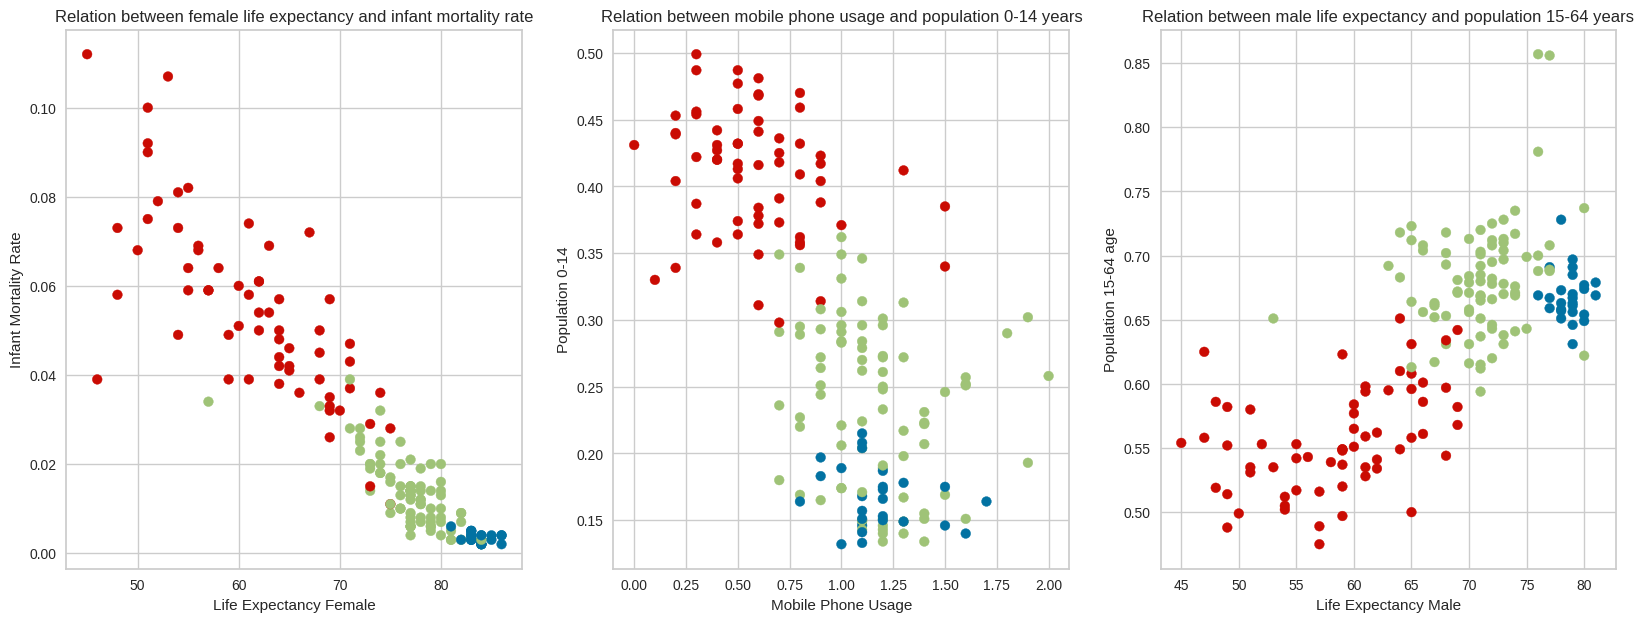

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.scatter(x=df_clean['Life Expectancy Female'], y=df_clean['Infant Mortality Rate'], marker='o', c=label_color)
plt.xlabel('Life Expectancy Female')
plt.ylabel('Infant Mortality Rate')
plt.title('Relation between female life expectancy and infant mortality rate')

plt.subplot(1,3,2)
plt.scatter(x=df_clean['Mobile Phone Usage'], y=df_clean['Population 0-14'], marker='o', c=label_color)
plt.xlabel('Mobile Phone Usage')
plt.ylabel('Population 0-14')
plt.title('Relation between mobile phone usage and population 0-14 years')

plt.subplot(1,3,3)
plt.scatter(x=df_clean['Life Expectancy Male'], y=df_clean['Population 15-64'], marker='o', c=label_color)
plt.xlabel('Life Expectancy Male')
plt.ylabel('Population 15-64 age')
plt.title('Relation between male life expectancy and population 15-64 years')

plt.show()

# Hierarchial Clustering

In [ ]:
df_train.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,kmeans_labels
0,0.241085,0.733673,-0.099269,-0.145350,-0.874226,-0.454207,0.662583,-0.174521,-0.934401,-0.018487,0.167855,-0.130010,-0.158467,0.668944,-0.558750,0.541928,0
1,2.169232,0.189712,0.611634,-0.210537,-1.238575,-0.483635,-0.007818,3.159010,-0.934401,-1.895467,-1.979233,-1.152154,1.730363,-1.888970,-0.982336,-0.636900,1
2,1.342883,0.566931,-0.029912,-0.277006,-0.837791,-0.560683,-0.055420,1.293820,-1.291058,-1.203948,-1.075196,-0.385546,1.315742,-1.326792,-0.890252,-0.576447,1
3,0.149269,-0.701399,0.507600,-0.271515,-0.582746,-0.362713,-0.523511,0.460438,-0.934401,-2.586986,-2.318247,1.403207,0.468072,-0.118107,-0.779751,0.036716,1
4,1.801966,-0.045366,-0.307338,-0.274877,-0.145527,-0.558008,-0.055420,1.611300,-1.291058,-1.599102,-1.414210,-1.152154,1.555301,-1.635990,-0.963919,-1.258699,1


In [ ]:
df_train.iloc[:,0:16]

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.241085,0.733673,-0.099269,-0.145350,-0.874226,-0.454207,0.662583,-0.174521,-0.934401,-0.018487,0.167855,-0.130010,-0.158467,0.668944,-0.558750,0.541928
1,2.169232,0.189712,0.611634,-0.210537,-1.238575,-0.483635,-0.007818,3.159010,-0.934401,-1.895467,-1.979233,-1.152154,1.730363,-1.888970,-0.982336,-0.636900
2,1.342883,0.566931,-0.029912,-0.277006,-0.837791,-0.560683,-0.055420,1.293820,-1.291058,-1.203948,-1.075196,-0.385546,1.315742,-1.326792,-0.890252,-0.576447
3,0.149269,-0.701399,0.507600,-0.271515,-0.582746,-0.362713,-0.523511,0.460438,-0.934401,-2.586986,-2.318247,1.403207,0.468072,-0.118107,-0.779751,0.036716
4,1.801966,-0.045366,-0.307338,-0.274877,-0.145527,-0.558008,-0.055420,1.611300,-1.291058,-1.599102,-1.414210,-1.152154,1.555301,-1.635990,-0.963919,-1.258699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.401630,-0.471787,11.500591,-0.279018,-0.291267,-0.316698,-0.337068,-0.214206,-0.221086,0.179090,-0.058154,0.125526,-0.057115,0.261364,-0.227248,0.459885
167,-0.677080,-0.438986,0.178157,-0.265760,-0.546311,-0.078600,-0.293432,-0.293575,0.848886,0.080302,-0.171159,1.147671,-0.757364,1.048414,0.141088,-2.018676
168,-0.860713,0.036638,-0.446051,10.382036,3.971623,3.951423,-0.384670,-0.849164,1.205544,0.870609,0.958887,-0.130010,-0.849502,0.500290,1.025093,1.090320
169,-0.677080,-0.089102,-0.411373,-0.249585,0.728912,0.070145,0.206393,-0.690424,0.492229,0.771821,0.619873,1.147671,-0.609943,0.064601,1.135594,1.681893


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df_train.iloc[:,0:16], method = 'ward')

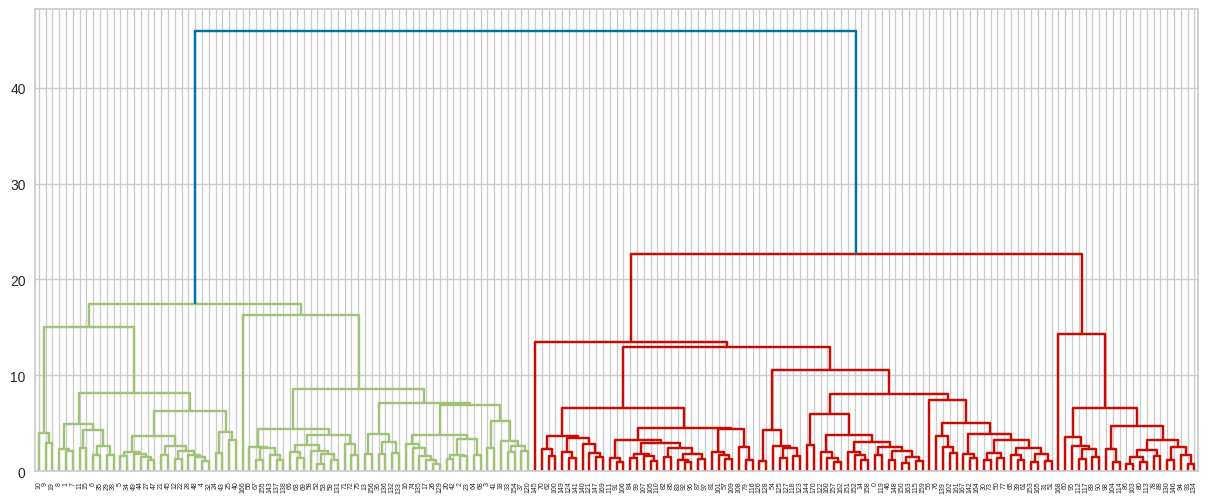

In [ ]:
plt.figure(figsize=(15,6))
dendrogram(z)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
mdl_hc = AgglomerativeClustering(n_clusters=3,linkage='ward')
mdl_hc.fit(df_train)
mdl_hc.labels_

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2])

In [ ]:
df_train['Hierarchial_labels']=mdl_hc.labels_

In [ ]:
df_train

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,kmeans_labels,Hierarchial_labels
0,0.241085,0.733673,-0.099269,-0.145350,-0.874226,-0.454207,0.662583,-0.174521,-0.934401,-0.018487,0.167855,-0.130010,-0.158467,0.668944,-0.558750,0.541928,0,2
1,2.169232,0.189712,0.611634,-0.210537,-1.238575,-0.483635,-0.007818,3.159010,-0.934401,-1.895467,-1.979233,-1.152154,1.730363,-1.888970,-0.982336,-0.636900,1,0
2,1.342883,0.566931,-0.029912,-0.277006,-0.837791,-0.560683,-0.055420,1.293820,-1.291058,-1.203948,-1.075196,-0.385546,1.315742,-1.326792,-0.890252,-0.576447,1,0
3,0.149269,-0.701399,0.507600,-0.271515,-0.582746,-0.362713,-0.523511,0.460438,-0.934401,-2.586986,-2.318247,1.403207,0.468072,-0.118107,-0.779751,0.036716,1,0
4,1.801966,-0.045366,-0.307338,-0.274877,-0.145527,-0.558008,-0.055420,1.611300,-1.291058,-1.599102,-1.414210,-1.152154,1.555301,-1.635990,-0.963919,-1.258699,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.401630,-0.471787,11.500591,-0.279018,-0.291267,-0.316698,-0.337068,-0.214206,-0.221086,0.179090,-0.058154,0.125526,-0.057115,0.261364,-0.227248,0.459885,0,0
167,-0.677080,-0.438986,0.178157,-0.265760,-0.546311,-0.078600,-0.293432,-0.293575,0.848886,0.080302,-0.171159,1.147671,-0.757364,1.048414,0.141088,-2.018676,0,2
168,-0.860713,0.036638,-0.446051,10.382036,3.971623,3.951423,-0.384670,-0.849164,1.205544,0.870609,0.958887,-0.130010,-0.849502,0.500290,1.025093,1.090320,2,1
169,-0.677080,-0.089102,-0.411373,-0.249585,0.728912,0.070145,0.206393,-0.690424,0.492229,0.771821,0.619873,1.147671,-0.609943,0.064601,1.135594,1.681893,0,2


In [ ]:
df_clean['Hierarchial_labels']=mdl_hc.labels_

In [ ]:
df_clean

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,kmeans_label,Hierarchial_labels
0,0.025,72.0,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,0,2
1,0.046,52.1,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola,1,0
2,0.037,65.9,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin,1,0
3,0.024,19.5,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,1,0
4,0.042,43.5,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9,694.0,4363219094,0.060,490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname,0,0
202,0.015,29.1,41.0,23676348287,0.053,935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago,0,2
204,0.013,46.5,5.0,15533800000000,0.177,8467,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States,2,1
205,0.015,41.9,7.0,47236710623,0.088,1213,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay,0,2


In [ ]:
# printing the countries in each cluster
for i in range(0,3):
  print("Cluster:", i)
  print(list(df_clean[df_clean['Hierarchial_labels']==i]['Country']))
  print()

Cluster: 0
['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Afghanistan', 'Bangladesh', 'Bhutan', 'Cambodia', 'India', 'Indonesia', 'Kyrgyz Republic', 'Lao PDR', 'Nepal', 'Pakistan', 'Philippines', 'Sri Lanka', 'Tajikistan', 'Timor-Leste', 'Uzbekistan', 'Iraq', 'Yemen, Rep.', 'Fiji', 'Kiribati', 'Micronesia, Fed. Sts.', 'Papua New Guinea', 'Solomon Islands', 'Tonga', 'Vanuatu', 'Belize', 'Guatemala', 'Guyana', 'Haiti', 'Suriname']

Cluster: 1
['Japan', 'Korea, Rep.', 'Austria', 'Belgium', 'Denma

In [ ]:
# internal validation for hierarchial clustering

dunn_hc_score= dunn(df_train_distance,mdl_hc.labels_)
print('dunn',dunn_hc_score)
print('calinski_harabasz_score',metrics.calinski_harabasz_score(df_train.iloc[:,0:16],mdl_hc.labels_))

dunn 0.08865875089628507
calinski_harabasz_score 78.0685387249275


# Plots for Hierarchial clustering

In [ ]:
LABEL_COLOR_MAP = {0: 'g', 1: 'r', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in df_clean['Hierarchial_labels']]

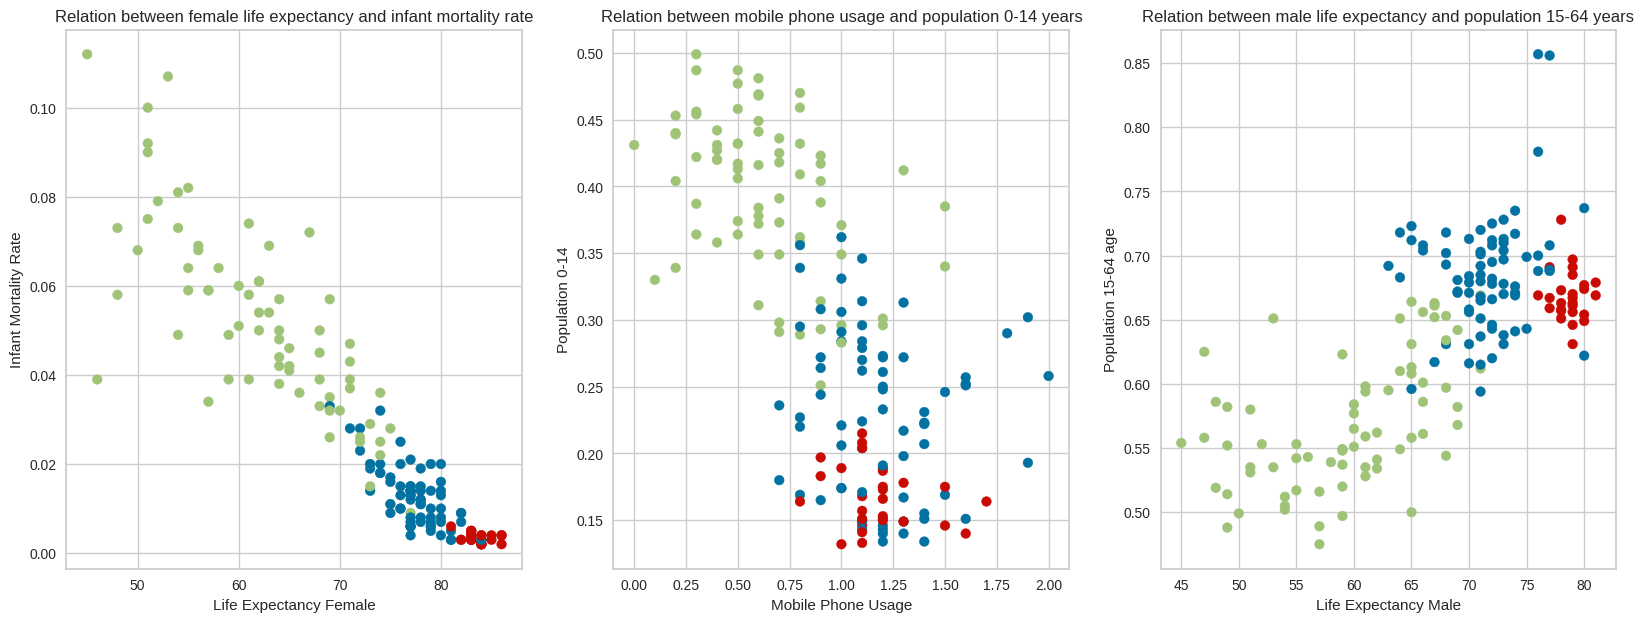

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.scatter(x=df_clean['Life Expectancy Female'], y=df_clean['Infant Mortality Rate'], marker='o', c=label_color)
plt.xlabel('Life Expectancy Female')
plt.ylabel('Infant Mortality Rate')
plt.title('Relation between female life expectancy and infant mortality rate')

plt.subplot(1,3,2)
plt.scatter(x=df_clean['Mobile Phone Usage'], y=df_clean['Population 0-14'], marker='o', c=label_color)
plt.xlabel('Mobile Phone Usage')
plt.ylabel('Population 0-14')
plt.title('Relation between mobile phone usage and population 0-14 years')

plt.subplot(1,3,3)
plt.scatter(x=df_clean['Life Expectancy Male'], y=df_clean['Population 15-64'], marker='o', c=label_color)
plt.xlabel('Life Expectancy Male')
plt.ylabel('Population 15-64 age')
plt.title('Relation between male life expectancy and population 15-64 years')

plt.show()